In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import patsy
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from scipy import optimize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.datasets import *
from keras.models import Sequential 
from keras.layers import Dense, Embedding 
from keras.layers import LSTM 
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.neural_network import MLPRegressor

**Pandas, data cleansing and Feature Engineering  (Feature selection )**

In [2]:
from google.colab import files
files.upload()

Saving hour.csv to hour.csv


{'hour.csv': b'instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt\r\n1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16\r\n2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40\r\n3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32\r\n4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13\r\n5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1\r\n6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1\r\n7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2\r\n8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3\r\n9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8\r\n10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0,8,6,14\r\n11,2011-01-01,1,0,1,10,0,6,0,1,0.38,0.3939,0.76,0.2537,12,24,36\r\n12,2011-01-01,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,26,30,56\r\n13,2011-01-01,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,29,55,84\r\n14,2011-01-01,1,0,1,13,0,6,0,2,0.46,0.4545,0.72,0.2985,47,47,94\r\n15,2011-01-01,1

In [3]:
pd.read_csv("hour.csv")

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

Let's assign this data set to one variable:

In [4]:
df = pd.read_csv("hour.csv")

In [5]:
df

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [6]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [7]:
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [8]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
df.shape

(17379, 17)

In [10]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [11]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
df.isnull().head()

instant  dteday  season     yr   mnth     hr  holiday  weekday  workingday  \
0    False   False   False  False  False  False    False    False       False   
1    False   False   False  False  False  False    False    False       False   
2    False   False   False  False  False  False    False    False       False   
3    False   False   False  False  False  False    False    False       False   
4    False   False   False  False  False  False    False    False       False   

   weathersit   temp  atemp    hum  windspeed  casual  registered    cnt  
0       False  False  False  False      False   False       False  False  
1       False  False  False  False      False   False       False  False  
2       False  False  False  False      False   False       False  False  
3       False  False  False  False      False   False       False  False  
4       False  False  False  False      False   False       False  False

In [13]:
df.isna().sum()*100/df.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [14]:
df2_group = df.groupby(by = [ 'hr']).sum()
df2_group = df2_group.sort_values(['hr'],ascending = True) 
df2_group = df2_group.reset_index()
df2_group

hr  instant  season   yr  mnth  holiday  weekday  workingday  weathersit  \
0    0  6299998    1815  365  4744       21     2181         496        1015   
1    1  6278992    1808  364  4725       21     2178         494        1014   
2    2  6253775    1796  363  4696       21     2165         487        1008   
3    3  6147304    1770  355  4632       18     2110         470         993   
4    4  6198111    1779  360  4645       20     2099         470         994   
5    5  6279702    1802  364  4719       21     2168         495        1020   
6    6  6288923    1811  364  4735       21     2182         496        1052   
7    7  6295933    1815  364  4744       21     2182         496        1081   
8    8  6296660    1815  364  4744       21     2182         496        1072   
9    9  6297387    1815  364  4744       21     2182         496        1079   
10  10  6298114    1815  364  4744       21     2182         496        1063   
11  11  6298841    1815  364  4744       21     2182         496        1054   
12  12  6299965    1816  364  4745       21     2184         497        1068   
13  13  6316578    1820  365  4755       21     2186         498        1053   
14  14  6317307    1820  365  4755       21     2186         498        1045   
15  15  6318036    1820  365  4755       21     2186         498        1039   
16  16  6319353    1821  365  4756       21     2190         499        1021   
17  17  6320083    1821  365  4756       21     2190         499        1029   
18  18  6314588    1817  365  4747       21     2181         498        1027   
19  19  6315316    1817  365  4747       21     2181         498        1006   
20  20  6316044    1817  365  4747       21     2181         498        1004   
21  21  6316772    1817  365  4747       21     2181         498        1000   
22  22  6317500    1817  365  4747       21     2181         498        1002   
23  23  6318228    1817  365  4747       21     2181         498        1031   

      temp     atemp     hum  windspeed  casual  registered     cnt  
0   339.34  327.5020  501.68   117.4366    7375       31755   39130  
1   332.58  320.9413  509.85   114.8692    4709       19455   24164  
2   325.02  314.0169  512.53   110.4813    3412       12940   16352  
3   315.82  305.5619  508.66   105.1976    1893        6281    8174  
4   311.30  301.4870  517.43   108.6015     874        3554    4428  
5   312.70  303.3953  532.68   107.7955    1012       13249   14261  
6   313.54  304.0473  539.53   114.3484    3017       52115   55132  
7   319.22  309.3796  531.37   119.1668    8037      146134  154171  
8   330.78  320.0776  510.85   128.3611   15761      245240  261001  
9   346.58  333.4857  481.05   139.0477   22458      136980  159438  
10  363.92  347.6067  447.88   146.8837   33789       92468  126257  
11  379.94  361.6659  415.43   150.7355   43286      108034  151320  
12  393.32  373.3937  390.72   157.2573   49718      134696  184414  
13  404.40  383.0889  372.95   161.5704   52713      132206  184919  
14  411.94  389.4230  362.30   169.4651   55089      120563  175652  
15  414.52  391.1798  358.76   171.4192   54606      128543  183149  
16  412.42  388.6955  361.93   173.2414   53834      173914  227748  
17  404.84  381.9537  374.81   170.3609   54220      282640  336860  
18  393.98  373.2719  390.20   163.5696   44496      265276  309772  
19  381.60  363.6059  416.74   152.9875   35505      191284  226789  
20  370.26  354.6972  437.87   142.1218   26378      138172  164550  
21  360.58  346.8943  459.76   131.6740   20570      104875  125445  
22  352.72  339.6375  475.49   127.1382   16200       79412   95612  
23  345.82  333.4869  490.14   119.9760   11065       52876   63941

<AxesSubplot:xlabel='hr', ylabel='cnt'>

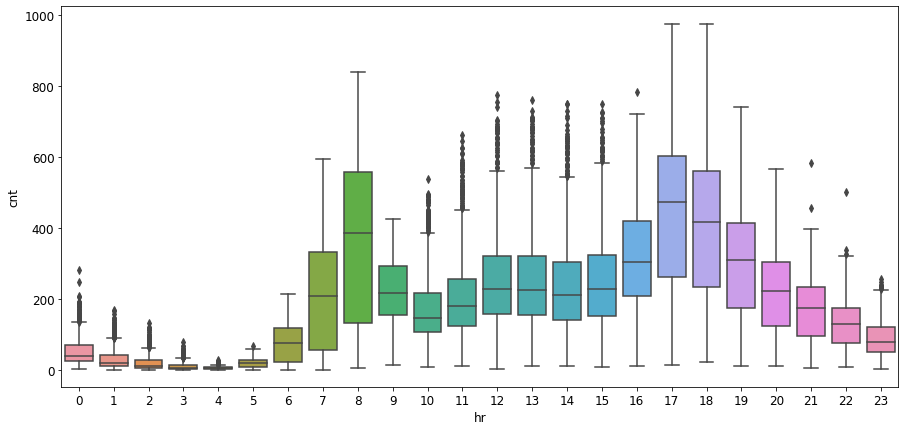

In [15]:
plt.figure(figsize=(15,7))
sns.boxplot(x="hr",y="cnt", data=df)

<AxesSubplot:ylabel='cnt'>

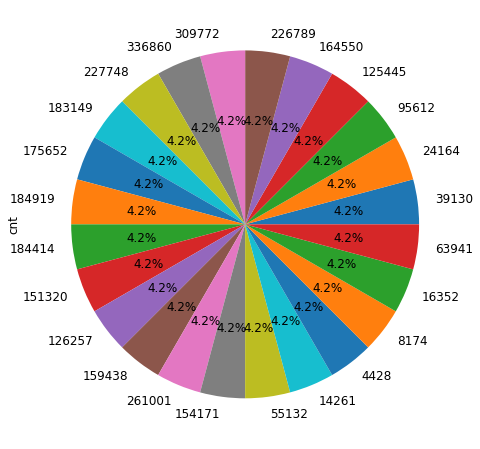

In [16]:
df2_group["cnt"].value_counts().plot(kind = "pie", autopct='%1.1f%%', figsize=(8,8))

We can see the hours in which most of the bycicles are rented: 8 and 5. We can see some outliers too for diferent hours, something that can improve the models in the linear regressions.

In [17]:
grouped_WSit = df.groupby('weathersit')

In [18]:
grouped_WSit.describe()
# It retunrs the mean by the Weathersit
grouped_WSit.mean()

instant    season        yr      mnth         hr   holiday  \
weathersit                                                                   
1           8696.750723  2.511084  0.505389  6.511872  11.731709  0.029878   
2           8828.604533  2.492518  0.511884  6.618838  10.959287  0.030150   
3           8197.145877  2.458069  0.449612  6.498238  11.940099  0.015504   
4           6188.333333  1.000000  0.666667  1.000000  11.666667  0.000000   

             weekday  workingday      temp     atemp       hum  windspeed  \
weathersit                                                                  
1           2.999124    0.668711  0.511054  0.488387  0.573747   0.190553   
2           3.010563    0.702245  0.474445  0.456591  0.698807   0.179973   
3           3.017618    0.732911  0.456688  0.436386  0.827632   0.218825   
4           3.333333    0.666667  0.186667  0.186900  0.883333   0.204000   

               casual  registered         cnt  
weathersit                                     
1           40.545431  164.323841  204.869272  
2           29.595290  145.570202  175.165493  
3           16.055673   95.523608  111.579281  
4            2.666667   71.666667   74.333333

We can see that there is a relation between the weathersit and total Bicycles rented.

In [19]:
grouped_season = df.groupby('season')
grouped_season

In [20]:
grouped_season.tail()

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
12758    12759  2012-06-20       2   1     6  19        0        3   
12759    12760  2012-06-20       2   1     6  20        0        3   
12760    12761  2012-06-20       2   1     6  21        0        3   
12761    12762  2012-06-20       2   1     6  22        0        3   
12762    12763  2012-06-20       2   1     6  23        0        3   
15014    15015  2012-09-22       3   1     9  19        0        6   
15015    15016  2012-09-22       3   1     9  20        0        6   
15016    15017  2012-09-22       3   1     9  21        0        6   
15017    15018  2012-09-22       3   1     9  22        0        6   
15018    15019  2012-09-22       3   1     9  23        0        6   
17112    17113  2012-12-20       4   1    12  19        0        4   
17113    17114  2012-12-20       4   1    12  20        0        4   
17114    17115  2012-12-20       4   1    12  21        0        4   
17115    17116  2012-12-20       4   1    12  22        0        4   
17116    17117  2012-12-20       4   1    12  23        0        4   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
12758           1           1  0.88  0.7879  0.37     0.2537      90   
12759           1           1  0.86  0.7727  0.39     0.2239      81   
12760           1           1  0.84  0.7576  0.44     0.0896      42   
12761           1           1  0.82  0.7576  0.46     0.1045      31   
12762           1           1  0.78  0.7424  0.59     0.1045      21   
15014           0           1  0.70  0.6515  0.58     0.1940      99   
15015           0           1  0.70  0.6515  0.54     0.2537      76   
15016           0           1  0.64  0.6212  0.57     0.2537      59   
15017           0           1  0.62  0.6212  0.57     0.1940      59   
15018           0           1  0.62  0.6212  0.50     0.1940      34   
17112           1           3  0.34  0.3182  0.71     0.2537       3   
17113           1           3  0.34  0.3333  0.76     0.1642       1   
17114           1           3  0.34  0.3333  0.76     0.1642       1   
17115           1           3  0.34  0.3333  0.87     0.1940       1   
17116           1           3  0.40  0.4091  0.82     0.2985       0   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
12758         449  539  
12759         326  407  
12760         302  344  
12761         226  257  
12762         102  123  
15014         308  407  
15015         249  325  
15016         202  261  
15017         180  239  
15018         137  171  
17112         115  118  
17113          49   50  
17114          25   26  
17115          20   21  
17116          13   13  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49

In [21]:
season_grouped_1  = df[df['season'] == 1]
season_grouped_1

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[4242 rows x 17 columns]

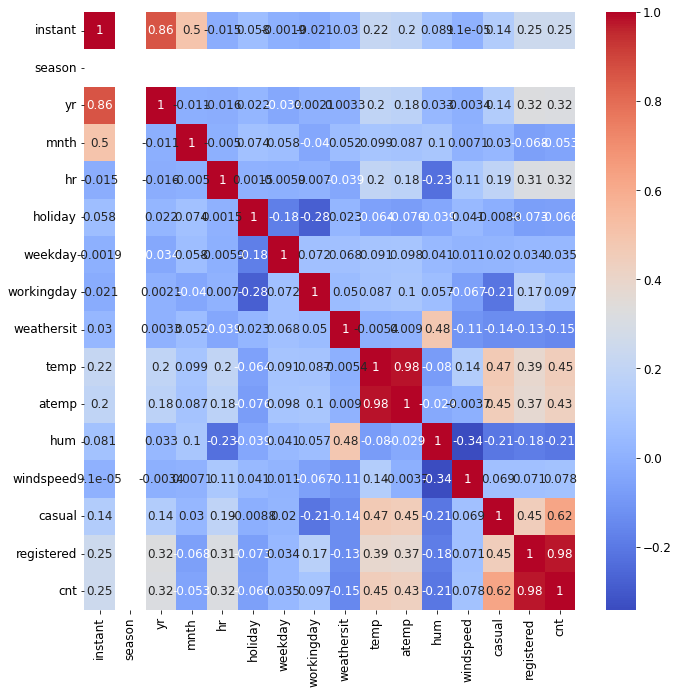

In [22]:
corr_matrix_S1 = season_grouped_1.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corr_matrix_S1, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [23]:
grouped_season.describe()
# It retunrs the mean by the Season
grouped_season.mean()

instant        yr       mnth         hr   holiday   weekday  \
season                                                                     
1        6302.008015  0.512494   3.119755  11.648515  0.038661  3.008722   
2        7287.727376  0.500340   4.654117  11.512134  0.021774  2.991608   
3        9526.588968  0.501779   7.689724  11.507562  0.021352  3.033141   
4       11655.779301  0.495747  10.702505  11.522448  0.034026  2.979915   

        workingday  weathersit      temp     atemp       hum  windspeed  \
season                                                                    
1         0.658652    1.460160  0.299147  0.298116  0.581348   0.215107   
2         0.695396    1.443638  0.544663  0.520547  0.627022   0.203410   
3         0.698621    1.330294  0.706410  0.656004  0.633167   0.171593   
4         0.676749    1.472117  0.423138  0.415738  0.667124   0.170819   

           casual  registered         cnt  
season                                     
1       14.290901   96.823668  111.114569  
2       46.160581  162.183488  208.344069  
3       50.287144  185.729093  236.016237  
4       30.666824  168.202032  198.868856

In [24]:
correlation_season = grouped_season.corr()
correlation_season 

instant        yr      mnth        hr   holiday   weekday  \
season                                                                          
1      instant     1.000000  0.860852  0.498219 -0.015163  0.057989 -0.001889   
       yr          0.860852  1.000000 -0.010556 -0.016398  0.021897 -0.034247   
       mnth        0.498219 -0.010556  1.000000 -0.005013  0.073616  0.058355   
       hr         -0.015163 -0.016398 -0.005013  1.000000  0.001532 -0.005920   
       holiday     0.057989  0.021897  0.073616  0.001532  1.000000 -0.183890   
       weekday    -0.001889 -0.034247  0.058355 -0.005920 -0.183890  1.000000   
       workingday -0.020597  0.002080 -0.039585  0.006994 -0.278565  0.071643   
       weathersit  0.030186  0.003330  0.051870 -0.039388  0.023464  0.068011   
       temp        0.216644  0.195524  0.098589  0.199659 -0.063658  0.090626   
       atemp       0.197703  0.180129  0.087382  0.178576 -0.076258  0.097774   
       hum         0.080514  0.032900  0.100025 -0.227220 -0.039074  0.040995   
       windspeed   0.000091 -0.003410  0.007109  0.112761  0.040725  0.011474   
       casual      0.135868  0.139609  0.029849  0.192285 -0.008849  0.020157   
       registered  0.245816  0.323906 -0.067921  0.311584 -0.072770  0.034448   
       cnt         0.246440  0.315648 -0.052570  0.316998 -0.065728  0.034793   
2      instant     1.000000  0.989589  0.135795  0.000528  0.001258  0.001674   
       yr          0.989589  1.000000 -0.001426 -0.000706 -0.000102  0.004665   
       mnth        0.135795 -0.001426  1.000000 -0.002211 -0.024245 -0.026712   
       hr          0.000528 -0.000706 -0.002211  1.000000 -0.000262 -0.001364   
       holiday     0.001258 -0.000102 -0.024245 -0.000262  1.000000 -0.074167   
       weekday     0.001674  0.004665 -0.026712 -0.001364 -0.074167  1.000000   
       workingday -0.003725 -0.000042 -0.017938  0.000698 -0.225421  0.020192   
       weathersit -0.070886 -0.055737 -0.107994 -0.035629 -0.070044 -0.026081   
       temp        0.171713  0.072182  0.655243  0.245499  0.101275 -0.068352   
       atemp       0.180434  0.082762  0.648297  0.245479  0.098275 -0.071069   
       hum        -0.141345 -0.152274  0.031002 -0.300355  0.015635 -0.043114   
       windspeed  -0.043961 -0.019327 -0.159987  0.151195  0.008044 -0.047971   
       casual      0.204672  0.190512  0.104729  0.347156  0.040972  0.039317   
       registered  0.276134  0.259987  0.126388  0.413191 -0.019115  0.037069   
       cnt         0.286360  0.268946  0.134439  0.440967 -0.003004  0.042054   
3      instant     1.000000  0.989204  0.141519  0.000662 -0.002496  0.015518   
       yr          0.989204  1.000000  0.001871 -0.001098 -0.000526  0.015510   
       mnth        0.141519  0.001871  1.000000  0.001327  0.048419 -0.005653   
       hr          0.000662 -0.001098  0.001327  1.000000 -0.000162 -0.005827   
       holiday    -0.002496 -0.000526  0.048419 -0.000162  1.000000 -0.114044   
       weekday     0.015518  0.015510 -0.005653 -0.005827 -0.114044  1.000000   
       workingday -0.014022 -0.015598 -0.018653  0.000333 -0.224892  0.027805   
       weathersit  0.001246 -0.016871  0.147211 -0.001197  0.042936  0.034684   
       temp       -0.018514  0.053815 -0.448823  0.307956  0.027934  0.024438   
       atemp      -0.046457  0.020641 -0.416567  0.269646  0.025176 -0.016491   
       hum        -0.018795 -0.061395  0.300387 -0.326491  0.046770 -0.026038   
       windspeed  -0.046015 -0.043235 -0.029229  0.191303 -0.035841  0.020073   
       casual      0.141525  0.147804 -0.015414  0.434974  0.118951  0.016629   
       registered  0.246717  0.245483  0.009195  0.434806 -0.035384  0.012793   
       cnt         0.244727  0.245332  0.003706  0.479869  0.001350  0.015122   
4      instant     1.000000  0.990393  0.137424  0.003549 -0.000401 -0.005209   
       yr          0.990393  1.000000  0.006247  0.002042  0.001597 -0.004916   
       mnth        0.137424  0.006247  1.000000 -0.

People don't bother about the weathersit, i.e, 1, 2, 3, 4, ( Clear ... , Mist + Cloudy..., ight Snow, Light Rain..., Heavy Rain + Ice Pallets).

Here it can be seen that on the seasons of spring and fall we have the majority of bicycles rented.

In [25]:
cov_hourscnt =df.cov()
cov_hourscnt

instant       season           yr         mnth          hr  \
instant     2.517058e+07  2243.844056  2172.443031  8439.269248 -165.637242   
season      2.243844e+03     1.225268    -0.005946     3.160817   -0.046817   
yr          2.172443e+03    -0.005946     0.250008    -0.018007   -0.013369   
mnth        8.439269e+03     3.160817    -0.018007    11.825178   -0.137239   
hr         -1.656372e+02    -0.046817    -0.013369    -0.137239   47.808998   
holiday     1.234820e+01    -0.001774     0.000559     0.010595    0.000554   
weekday     1.365370e+01    -0.005185    -0.004498     0.071733   -0.048509   
workingday -7.975601e+00     0.007080    -0.000511    -0.005565    0.007354   
weathersit -4.554126e+01    -0.010279    -0.006124     0.011871   -0.089311   
temp        1.315561e+02     0.066506     0.003939     0.133551    0.183207   
atemp       1.186482e+02     0.060754     0.003370     0.122975    0.158927   
hum         9.269692e+00     0.032167    -0.008059     0.109078   -0.368847   
windspeed  -4.572973e+01    -0.020282    -0.000535    -0.056957    0.116102   
casual      3.915671e+04     6.560463     3.519905    11.606863  102.684174   
registered  2.141754e+05    29.189784    19.198785    63.641093  391.555310   
cnt         2.533321e+05    35.750248    22.718690    75.247956  494.239483   

              holiday    weekday  workingday  weathersit        temp  \
instant     12.348199  13.653700   -7.975601  -45.541259  131.556090   
season      -0.001774  -0.005185    0.007080   -0.010279    0.066506   
yr           0.000559  -0.004498   -0.000511   -0.006124    0.003939   
mnth         0.010595   0.071733   -0.005565    0.011871    0.133551   
hr           0.000554  -0.048509    0.007354   -0.089311    0.183207   
holiday      0.027944  -0.034230   -0.019643   -0.001821   -0.000880   
weekday     -0.034230   4.023119    0.033566    0.004246   -0.000693   
workingday  -0.019643   0.033566    0.216626    0.013293    0.004964   
weathersit  -0.001821   0.004246    0.013293    0.408777   -0.012636   
temp        -0.000880  -0.000693    0.004964   -0.012636    0.037078   
atemp       -0.000890  -0.003041    0.004373   -0.011599    0.032683   
hum         -0.000341  -0.014379    0.001409    0.051577   -0.002596   
windspeed    0.000082   0.002822   -0.000674    0.002051   -0.000545   
casual       0.260150   3.235972   -6.906050   -4.811367    4.363584   
registered  -1.197919   6.550791    9.462757  -11.705993    9.774015   
cnt         -0.937769   9.786763    2.556708  -16.517360   14.137600   

                 atemp        hum  windspeed        casual     registered  \
instant     118.648235   9.269692 -45.729734  39156.708942  214175.400794   
season        0.060754   0.032167  -0.020282      6.560463      29.189784   
yr            0.003370  -0.008059  -0.000535      3.519905      19.198785   
mnth          0.122975   0.109078  -0.056957     11.606863      63.641093   
hr            0.158927  -0.368847   0.116102    102.684174     391.555310   
holiday      -0.000890  -0.000341   0.000082      0.260150      -1.197919   
weekday      -0.003041  -0.014379   0.002822      3.235972       6.550791   
workingday    0.004373   0.001409  -0.000674     -6.906050       9.462757   
weathersit   -0.011599   0.051577   0.002051     -4.811367     -11.705993   
temp          0.032683  -0.002596  -0.000545      4.363584       9.774015   
atemp         0.029532  -0.001721  -0.001311      3.847457       8.650110   
hum          -0.001721   0.037222  -0.006847     -3.301074      -7.999213   
windspeed    -0.001311  -0.006847   0.014967      0.544609       1.524342   
casual        3.847457  -3.301074   0.544609   2430.986021    3780.723542   
registered    8.650110  -7.999213   1.524342   3780.723542   22909.027999   
cnt          12.497567 -11.300287   2.068951   6211.709563   26689.751541   

                      cnt  
instant     253332.109736  
season          35.750248  
yr              22.718690  
mnth            75.247956 

In [26]:
correlation_hours = df.corr()
correlation_hours 

instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.008740 -0.135386  0.137252  0.003988   
casual      0.158295  0.120206  0.142779  0.068457  0.301202  0.031564   
registered  0.282046  0.174226  0.253684  0.122273  0.374141 -0.047345   
cnt         0.278379  0.178056  0.250495  0.120638  0.394071 -0.030927   

             weekday  workingday  weathersit      temp     atemp       hum  \
instant     0.001357   -0.003416   -0.014198  0.136178  0.137615  0.009577   
season     -0.002335    0.013743   -0.014524  0.312025  0.319380  0.150625   
yr         -0.004485   -0.002196   -0.019157  0.040913  0.039222 -0.083546   
mnth        0.010400   -0.003477    0.005400  0.201691  0.208096  0.164411   
hr         -0.003498    0.002285   -0.020203  0.137603  0.133750 -0.276498   
holiday    -0.102088   -0.252471   -0.017036 -0.027340 -0.030973 -0.010588   
weekday     1.000000    0.035955    0.003311 -0.001795 -0.008821 -0.037158   
workingday  0.035955    1.000000    0.044672  0.055390  0.054667  0.015688   
weathersit  0.003311    0.044672    1.000000 -0.102640 -0.105563  0.418130   
temp       -0.001795    0.055390   -0.102640  1.000000  0.987672 -0.069881   
atemp      -0.008821    0.054667   -0.105563  0.987672  1.000000 -0.051918   
hum        -0.037158    0.015688    0.418130 -0.069881 -0.051918  1.000000   
windspeed   0.011502   -0.011830    0.026226 -0.023125 -0.062336 -0.290105   
casual      0.032721   -0.300942   -0.152628  0.459616  0.454080 -0.347028   
registered  0.021578    0.134326   -0.120966  0.335361  0.332559 -0.273933   
cnt         0.026900    0.030284   -0.142426  0.404772  0.400929 -0.322911   

            windspeed    casual  registered       cnt  
instant     -0.074505  0.158295    0.282046  0.278379  
season      -0.149773  0.120206    0.174226  0.178056  
yr          -0.008740  0.142779    0.253684  0.250495  
mnth        -0.135386  0.068457    0.122273  0.120638  
hr           0.137252  0.301202    0.374141  0.394071  
holiday      0.003988  0.031564   -0.047345 -0.030927  
weekday      0.011502  0.032721    0.021578  0.026900  
workingday  -0.011830 -0.300942    0.134326  0.030284  
weathersit   0.026226 -0.152628   -0.120966 -0.142426  
temp        -0.023125  0.459616    0.335361  0.404772  
atemp       -0.062336  0.454080    0.332559  0.400929  
hum         -0.290105 -0.347028   -0.273933 -0.322911  
windspeed    1.000000  0.090287    0.082321  0.093234  
casual       0.090287  1.000000    0.506618  0.694564  
registered   0.082321  0.506618    1.000000  0.972151  
cnt          0.093234  0.694564    0.972151  1.000000

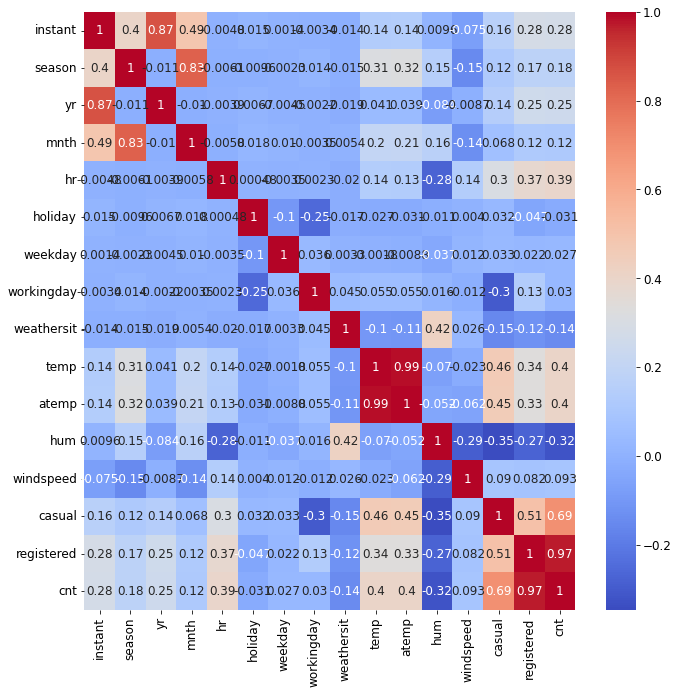

In [27]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

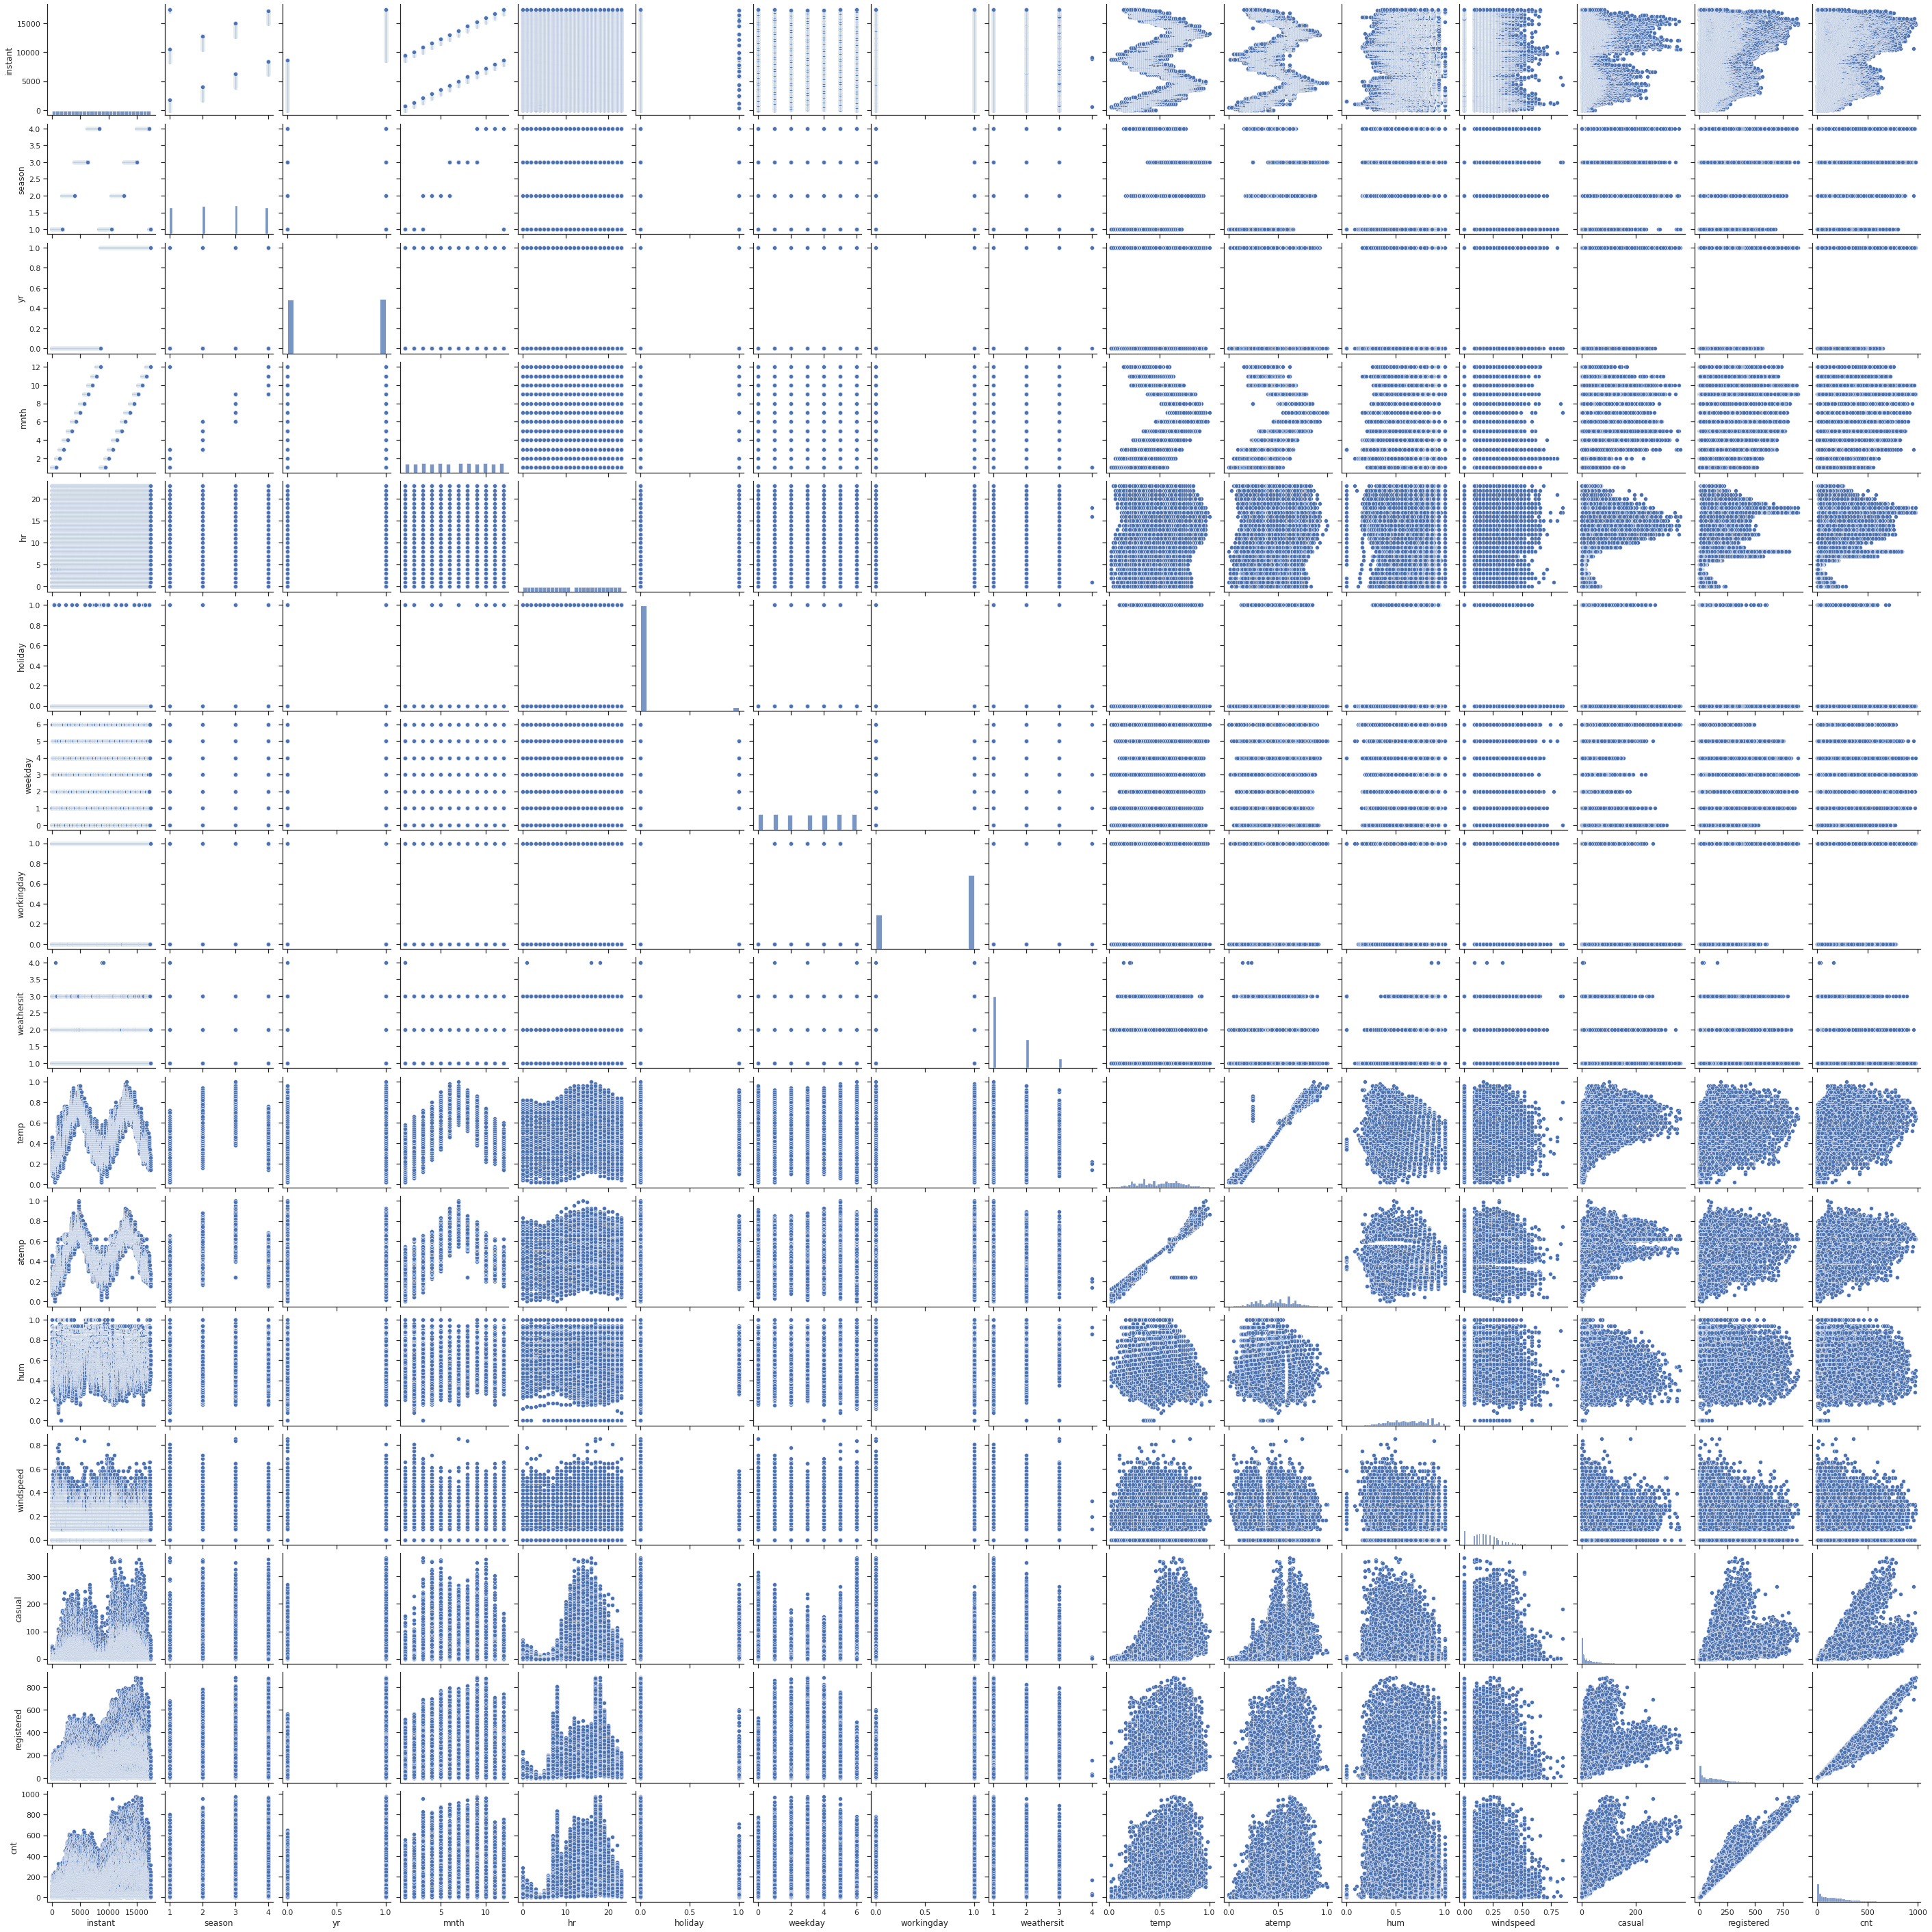

In [28]:
sns.set(style="ticks")

sns.pairplot(df)

Conclusion so far: we selected the following variables with good correlation and by interpretation of the graph in terms of our target variable **CNT**: 'instant','season', 'hr', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'hum', 'windspeed'.

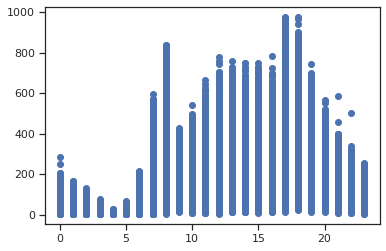

In [29]:
X=df['hr'].values.reshape(-1,1)
y=df['cnt'].values.reshape(-1,1)
plt.scatter(X,y)

#**Models**

# Model 1:  Feed forward Neural Network

In [30]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [31]:
features = ["instant", "season", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit", "temp", "hum", "windspeed"]

In [32]:
train = df.sample(frac=0.8)
test = df.loc[~df.index.isin(train.index)]

In [33]:
train_mean = train.mean()
train_std = train.std()
train_norm = (train - train_mean) / train_std
test_norm = (test - train_mean) / train_std

<ipython-input-33-751ab67a93b7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_mean = train.mean()
<ipython-input-33-751ab67a93b7>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_std = train.std()


In [34]:
train_features = train_norm[features].values
train_labels = train_norm["cnt"].values
test_features = test_norm[features].values
test_labels = test_norm["cnt"].values

In [35]:
model = Sequential()

In [36]:
model.add(Dense(128, input_dim=train_features.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="linear"))

In [37]:
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

In [38]:
history = model.fit(train_features, train_labels, epochs=50, batch_size=128, validation_data=(test_features, test_labels))

Epoch 1/50
109/109 [==============================] - 5s 26ms/step - loss: 0.5540 - mse: 0.5540 - val_loss: 0.4550 - val_mse: 0.4550
Epoch 2/50
109/109 [==============================] - 1s 9ms/step - loss: 0.4212 - mse: 0.4212 - val_loss: 0.3931 - val_mse: 0.3931
Epoch 3/50
109/109 [==============================] - 0s 4ms/step - loss: 0.3746 - mse: 0.3746 - val_loss: 0.3556 - val_mse: 0.3556
Epoch 4/50
109/109 [==============================] - 0s 3ms/step - loss: 0.3393 - mse: 0.3393 - val_loss: 0.3219 - val_mse: 0.3219
Epoch 5/50
109/109 [==============================] - 0s 3ms/step - loss: 0.3051 - mse: 0.3051 - val_loss: 0.2968 - val_mse: 0.2968
Epoch 6/50
109/109 [==============================] - 0s 3ms/step - loss: 0.2773 - mse: 0.2773 - val_loss: 0.2703 - val_mse: 0.2703
Epoch 7/50
109/109 [==============================] - 0s 3ms/step - loss: 0.2517 - mse: 0.2517 - val_loss: 0.2406 - val_mse: 0.2406
Epoch 8/50
109/109 [==============================] - 0s 3ms/step - loss: 0

In [39]:
test_predictions = model.predict(test_features)
test_mse = mean_squared_error(test_labels, test_predictions)
test_r2 = r2_score(test_labels, test_predictions)

print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

109/109 [==============================] - 0s 2ms/step
Test MSE: 0.054339688563886025
Test R^2: 0.9445608055882286


In [40]:
y_pred = model.predict(train_features)

435/435 [==============================] - 1s 3ms/step


In [41]:
y_pred = np.round(y_pred).astype(int)

In [42]:
scaler = StandardScaler()
train_features1 = scaler.fit_transform(train_norm)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [43]:
train_features1.shape

(13903, 17)

In [44]:
train_features1.resize(13903,1, refcheck=False)

In [45]:
y_pred.shape

(13903, 1)

In [46]:
resultados = pd.DataFrame({'y_test': train_features1.flatten(), 'y_pred': y_pred.flatten()})

In [47]:
resultados

y_test  y_pred
0     -1.796667      -1
1     -0.564616       0
2     -0.300896      -1
3      0.491427       0
4      0.931735      -1
...         ...     ...
13898  0.755728       0
13899  0.403714       0
13900  1.547470       1
13901 -1.620659      -1
13902 -1.356939       0

[13903 rows x 2 columns]

In [48]:
history_df = pd.DataFrame(history.history)
history_df

loss       mse  val_loss   val_mse
0   0.554041  0.554041  0.454974  0.454974
1   0.421209  0.421209  0.393070  0.393070
2   0.374587  0.374587  0.355635  0.355635
3   0.339261  0.339261  0.321911  0.321911
4   0.305110  0.305110  0.296813  0.296813
5   0.277252  0.277252  0.270272  0.270272
6   0.251743  0.251743  0.240620  0.240620
7   0.225031  0.225031  0.220140  0.220140
8   0.197997  0.197997  0.192805  0.192805
9   0.176749  0.176749  0.166991  0.166991
10  0.154716  0.154716  0.153840  0.153840
11  0.139223  0.139223  0.136644  0.136644
12  0.125499  0.125499  0.127395  0.127395
13  0.114556  0.114556  0.114323  0.114323
14  0.106059  0.106059  0.105313  0.105313
15  0.096727  0.096727  0.095423  0.095423
16  0.089673  0.089673  0.090557  0.090557
17  0.082005  0.082005  0.086440  0.086440
18  0.079136  0.079136  0.081610  0.081610
19  0.074497  0.074497  0.075701  0.075701
20  0.071067  0.071067  0.077220  0.077220
21  0.067183  0.067183  0.068756  0.068756
22  0.063958  0.063958  0.073889  0.073889
23  0.062606  0.062606  0.066639  0.066639
24  0.059951  0.059951  0.070990  0.070990
25  0.059598  0.059598  0.068364  0.068364
26  0.057381  0.057381  0.063487  0.063487
27  0.057008  0.057008  0.065051  0.065051
28  0.055463  0.055463  0.060225  0.060225
29  0.053865  0.053865  0.060259  0.060259
30  0.052644  0.052644  0.063658  0.063658
31  0.051313  0.051313  0.057035  0.057035
32  0.051195  0.051195  0.061023  0.061023
33  0.050649  0.050649  0.057854  0.057854
34  0.050084  0.050084  0.059477  0.059477
35  0.049826  0.049826  0.054569  0.054569
36  0.049069  0.049069  0.058216  0.058216
37  0.049134  0.049134  0.062485  0.062485
38  0.047042  0.047042  0.057435  0.057435
39  0.048825  0.048825  0.055075  0.055075
40  0.045880  0.045880  0.057204  0.057204
41  0.047487  0.047487  0.055522  0.055522
42  0.045267  0.045267  0.053926  0.053926
43  0.045066  0.045066  0.053037  0.053037
44  0.045800  0.045800  0.055672  0.055672
45  0.045930  0.045930  0.055162  0.055162
46  0.045879  0.045879  0.056311  0.056311
47  0.045342  0.045342  0.054869  0.054869
48  0.045075  0.045075  0.053952  0.053952
49  0.043928  0.043928  0.054340  0.054340

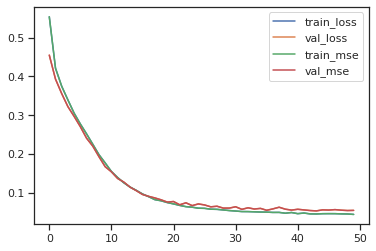

In [49]:
plt.plot(history_df["loss"], label="train_loss")
plt.plot(history_df["val_loss"], label="val_loss")
plt.plot(history_df["mse"], label="train_mse")
plt.plot(history_df["val_mse"], label="val_mse")
plt.legend()
plt.show()

#  With Backpropagation algorithm  (Keras)

In [50]:
dfb=df
dfb

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [51]:
dfb['dteday'] = pd.to_datetime(dfb['dteday'])

In [52]:
dfb['year'] = dfb['dteday'].dt.year
dfb['hour'] = dfb['dteday'].dt.hour

In [53]:
dfb.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'year', 'hour'],
      dtype='object')

In [54]:
columns = ["instant", "season", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit", "temp", "hum", "windspeed"]

In [55]:
X = dfb[columns].values
y = dfb['cnt'].values

In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [59]:
model.compile(optimizer='adam', loss='mse')

In [60]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

348/348 [==============================] - 2s 4ms/step - loss: 41093.5859 - val_loss: 20623.7402
Epoch 2/100
348/348 [==============================] - 1s 3ms/step - loss: 20287.4590 - val_loss: 20118.5176
Epoch 3/100
348/348 [==============================] - 1s 3ms/step - loss: 19971.3418 - val_loss: 20081.8828
Epoch 4/100
348/348 [==============================] - 1s 3ms/step - loss: 19676.7402 - val_loss: 19347.8438
Epoch 5/100
348/348 [==============================] - 1s 3ms/step - loss: 18880.4941 - val_loss: 18330.9004
Epoch 6/100
348/348 [==============================] - 1s 3ms/step - loss: 17504.4023 - val_loss: 16972.7715
Epoch 7/100
348/348 [==============================] - 1s 3ms/step - loss: 16101.4922 - val_loss: 15558.5000
Epoch 8/100
348/348 [==============================] - 1s 3ms/step - loss: 14775.5840 - val_loss: 14335.0654
Epoch 9/100
348/348 [==============================] - 2s 5ms/step - loss: 13497.5508 - val_loss: 13020.0332
Epoch 10/100
348/348 [=========

In [61]:
test_loss = model.evaluate(X_test, y_test)

109/109 [==============================] - 0s 2ms/step - loss: 2265.5420


In [62]:
print('Test MSE:', test_loss)

Test MSE: 2265.5419921875


In [63]:
y_pred = model.predict(X_test)

109/109 [==============================] - 0s 2ms/step


In [64]:
y_pred = np.round(y_pred).astype(int)

In [65]:
#resultados = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
resultados = pd.DataFrame({'y_test': y_test.flatten(), 'y_pred': y_pred.flatten()})

In [66]:
print(resultados.head(10))

   y_test  y_pred
0     425     423
1      88     136
2       4      19
3     526     597
4      13      24
5      32      21
6     706     691
7      26      31
8       2       8
9      21      37


In [67]:
def mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    return mape


In [68]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
predictions = lnr.predict(X_test)

In [69]:
print (mape(y_test, y_pred))

8.0255042759134


In [70]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse

2265.643555811277

In [71]:
r2

0.9284505250306723

Here, a good model can be observed, but when there is no significant filtration, results change drastically to the worse. With this in mind, we can conclude that the back propagation model is very sensitive to filtrations, i.e, feature engineering (variable selection)


# Model 2: Multilayer Perceptron for regresion (MLP)

In [72]:
dfb['dteday'] = pd.to_datetime(dfb['dteday'])

In [73]:
dfb['hour'] = dfb['dteday'].dt.hour

In [74]:
columns = ["instant", "season", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit", "temp", "hum", "windspeed"]

In [75]:
X = dfb[columns]
y = dfb['cnt']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [77]:
model = MLPRegressor(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam', max_iter=5000, random_state=1)

In [78]:
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=5000, random_state=1)

In [79]:
y_pred = model.predict(X_test)
results = pd.DataFrame({'y_test': list(y_test), 'y_pred': list(y_pred)})
results

y_test      y_pred
0        389  251.719821
1        146  127.363249
2        152  132.834602
3        188  354.899376
4         62  237.132766
...      ...         ...
5209      30  233.919926
5210      25   10.716756
5211     478  374.644589
5212     392  451.680887
5213     438  334.048553

[5214 rows x 2 columns]

In [80]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse

22495.264121841028

In [81]:
r2

0.34476835773905434

In [82]:
def mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    return mape


In [83]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
predictions = lnr.predict(X_test)

In [84]:
print (mape(y_test, y_pred))

4.247005989323363


Not a good result. This may be due to the fact that there is no further filtration, and that the model with MLPRegressor requires more specific parameters.

#**Regression Models**

# Baseline Regression Models

In [85]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'year', 'hour'],
      dtype='object')

In [86]:
df.drop(columns='dteday',inplace=True)

In [87]:
X = df[['instant','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual']]
y = df[['cnt']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [88]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
model_linear.coef_

array([[-6.63105369e-03,  1.64140442e+01,  1.18032710e+02,
         4.75501809e+00,  4.90512970e+00,  7.22249641e+00,
        -2.52561075e-01,  8.71525753e+01, -8.41418173e+00,
        -4.16676176e+01,  8.28931435e+01, -2.95977751e+01,
         3.37783417e+01,  2.35262706e+00]])

In [89]:
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train, y_train)
model_ridge.coef_

array([[-6.44185950e-03,  1.64140802e+01,  1.16374753e+02,
         4.61744196e+00,  4.90505604e+00,  7.21232986e+00,
        -2.53542278e-01,  8.71491475e+01, -8.41519391e+00,
        -4.03791230e+01,  8.14379154e+01, -2.95870854e+01,
         3.36808438e+01,  2.35264429e+00]])

In [90]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
model_lasso.coef_

array([ 6.83381848e-03,  1.61438086e+01,  0.00000000e+00, -4.96808490e+00,
        4.91503038e+00,  2.99522635e+00, -2.95784226e-01,  8.67124117e+01,
       -8.40230346e+00,  0.00000000e+00,  3.20241767e+01, -2.73146204e+01,
        2.44820021e+01,  2.36271881e+00])

In [91]:
predictions = model_linear.predict(X_train)
print("Linear")
print((mean_squared_error(predictions, y_train)))
predictions = model_linear.predict(X_test)
print((mean_squared_error(predictions, y_test)))
print(model_linear.score(X_test,y_test))

Linear
12882.211802351667
12723.102152200896
0.6053401278862831


In [92]:
print("Ridge")
predictions = model_ridge.predict(X_train)
print((mean_squared_error(predictions, y_train)))
predictions = model_ridge.predict(X_test)
print((mean_squared_error(predictions, y_test)))
print(model_ridge.score(X_test,y_test))

Ridge
12882.21496375069
12722.872535100785
0.6053472504146006


In [93]:
print("Lasso")
predictions = model_lasso.predict(X_train)
print((mean_squared_error(predictions, y_train)))
predictions = model_lasso.predict(X_test)
print((mean_squared_error(predictions, y_test)))
print(model_lasso.score(X_test,y_test))

Lasso
12893.94509494485
12717.627235748103
0.6055099551659233


In [94]:
for i in range(10):
  print(predictions[i], y_test[i])

-1.3110354347393383 [104]
136.44147493401132 [4]
145.0112652859551 [85]
63.62499557659416 [30]
413.58645848865706 [435]
339.57527919014376 [363]
192.5712989744873 [150]
12.738109138681665 [16]
111.11391603110684 [42]
157.98077262858735 [214]


There is no multicollinearity problem, all types of regression are the same (normal, ridge, lasso)

# Model with One Hot Encoding for Qualitative

In [95]:
one_hot_columns = ['season','yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit']

In [96]:
df2 = df.copy()
for column in one_hot_columns:
  one_hot = pd.get_dummies(df[column])
  df2 = pd.concat([df2, one_hot], axis=1)

df2.drop(columns=one_hot_columns,inplace=True)
df2

instant  temp   atemp   hum  windspeed  casual  registered  cnt  year  \
0            1  0.24  0.2879  0.81     0.0000       3          13   16  2011   
1            2  0.22  0.2727  0.80     0.0000       8          32   40  2011   
2            3  0.22  0.2727  0.80     0.0000       5          27   32  2011   
3            4  0.24  0.2879  0.75     0.0000       3          10   13  2011   
4            5  0.24  0.2879  0.75     0.0000       0           1    1  2011   
...        ...   ...     ...   ...        ...     ...         ...  ...   ...   
17374    17375  0.26  0.2576  0.60     0.1642      11         108  119  2012   
17375    17376  0.26  0.2576  0.60     0.1642       8          81   89  2012   
17376    17377  0.26  0.2576  0.60     0.1642       7          83   90  2012   
17377    17378  0.26  0.2727  0.56     0.1343      13          48   61  2012   
17378    17379  0.26  0.2727  0.65     0.1343      12          37   49  2012   

       hour  ...  3  4  5  6  0  1  1  2  3  4  
0         0  ...  0  0  0  1  1  0  1  0  0  0  
1         0  ...  0  0  0  1  1  0  1  0  0  0  
2         0  ...  0  0  0  1  1  0  1  0  0  0  
3         0  ...  0  0  0  1  1  0  1  0  0  0  
4         0  ...  0  0  0  1  1  0  1  0  0  0  
...     ...  ... .. .. .. .. .. .. .. .. .. ..  
17374     0  ...  0  0  0  0  0  1  0  1  0  0  
17375     0  ...  0  0  0  0  0  1  0  1  0  0  
17376     0  ...  0  0  0  0  0  1  1  0  0  0  
17377     0  ...  0  0  0  0  0  1  1  0  0  0  
17378     0  ...  0  0  0  0  0  1  1  0  0  0  

[17379 rows x 67 columns]

In [97]:
X = df2.copy()
X.drop(columns=['registered','cnt'],inplace=True)
y = df2[['cnt']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [98]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([[-5.57527190e-03, -4.77928454e+01,  9.73337655e+01,
        -2.48250010e+01,  1.29946097e+01,  2.02132377e+00,
         3.70499625e+01,  3.70192765e-12, -2.55438769e+01,
        -1.19138461e+01,  2.75339377e-01,  3.71823836e+01,
        -3.70499625e+01,  3.70499625e+01, -2.69169707e+01,
        -1.60440396e+01, -1.66563139e+01, -1.28570638e+01,
         6.20863634e+00,  1.40989359e+01,  1.43350011e+00,
         1.69429521e+01,  2.58024851e+01,  3.71432172e+00,
        -6.51400428e+00,  1.07875611e+01, -8.25911888e+01,
        -9.32812772e+01, -1.00503916e+02, -1.07474876e+02,
        -1.10120658e+02, -9.65176973e+01, -4.50217338e+01,
         7.85580824e+01,  2.07297389e+02,  4.23060227e+01,
        -3.91724721e+01, -3.13672353e+01, -7.24000798e+00,
        -1.41232903e+01, -3.54128284e+01, -2.58559609e+01,
         4.16921653e+01,  1.97427658e+02,  1.81957641e+02,
         9.53859213e+01,  3.52452319e+01, -1.58106252e+00,
        -3.03538031e+01, -5.92521036e+01,  4.76849748e+0

In [99]:
predictions = model.predict(X_train)
print((mean_squared_error(predictions, y_train)))
predictions = model.predict(X_test)
print((mean_squared_error(predictions, y_test)))
print(model.score(X_test,y_test))

6261.063853334627
6188.075590852306
0.8031458197874717


In [100]:
for i in range(10):
  print(predictions[i], y_test[i])

[154.13774952] [165]
[101.26669107] [11]
[83.36886739] [14]
[100.72264359] [30]
[312.75229958] [222]
[156.91176533] [141]
[-16.68387967] [1]
[21.83503133] [32]
[276.7645034] [44]
[88.09810648] [94]


In [101]:
def mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    return mape


In [102]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
predictions = lnr.predict(X_test)

In [103]:
print (mape(y_test, y_pred))

9.060267080160015


We found a very significant improvement compared to the normal model and the model with one_hot_encoding in the qualitative variables.

# Model Eliminating Correlated Variables (Not necessary since there is no multicollinearity)

From the Correlation matrix from above:

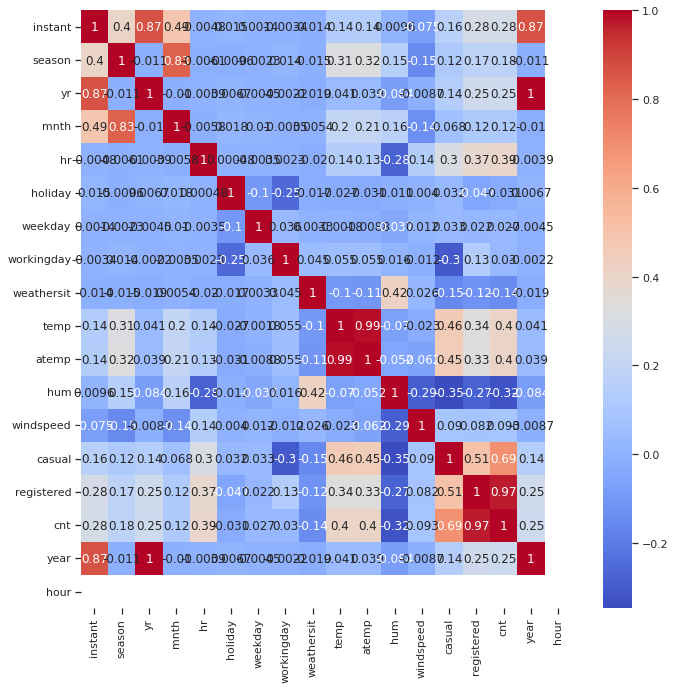

In [104]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [105]:
df.drop(columns=['yr','mnth','casual'],inplace=True)

In [106]:
X = df[['instant','season', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed',]]
y = df[['cnt']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([[ 8.55383793e-03,  3.45466635e+00,  7.54058511e+00,
        -2.23933782e+01,  1.89097509e+00,  4.05373321e+00,
        -5.55013038e+00,  2.83391744e+02, -1.98656284e+02,
         2.61839203e+01]])

In [107]:
predictions = model.predict(X_train)
print((mean_squared_error(predictions, y_train)))
predictions = model.predict(X_test)
print((mean_squared_error(predictions, y_test)))
print(model.score(X_test,y_test))

20362.280714668446
20195.830611424502
0.3947324049133004


In [108]:
def mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    return mape


In [109]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
predictions = lnr.predict(X_test)

In [110]:
print (mape(y_test, y_pred))

9.091257962671747


Not good results

# Model with Standardization of the Inputs in One_Hot Encoding

In [111]:
scaler = StandardScaler()
X = df2.copy()
X.drop(columns=['registered','cnt'],inplace=True)
y = df2[['cnt']]
X = X.values
X = scaler.fit_transform(X)
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([[-1.34105887e+01, -6.07235117e+00,  1.57894956e+01,
        -4.66628695e+00,  7.50299422e-01,  9.94485140e+01,
        -6.68606014e+14, -2.29180850e+14,  3.87994378e+14,
         3.93035735e+14,  3.95561173e+14,  3.87684254e+14,
        -2.50781189e+14,  4.17824825e+14,  3.48651809e+12,
         3.38676418e+12,  3.53490158e+12,  3.49538687e+12,
         3.55117884e+12,  3.49870436e+12,  3.55117884e+12,
         3.53707817e+12,  3.49538687e+12,  3.51082995e+12,
         3.49538687e+12,  3.54576515e+12, -7.18219374e+13,
        -7.17272477e+13, -7.12992915e+13, -7.04341069e+13,
        -7.04341069e+13, -7.13946564e+13, -7.17746111e+13,
        -7.18692266e+13, -7.18692266e+13, -7.18692266e+13,
        -7.18692266e+13, -7.18692266e+13, -7.19164788e+13,
        -7.19636939e+13, -7.19636939e+13, -7.19636939e+13,
        -7.20108723e+13, -7.20108723e+13, -7.19164788e+13,
        -7.19164788e+13, -7.19164788e+13, -7.19164788e+13,
        -7.19164788e+13, -7.19164788e+13, -7.31312174e+1

In [112]:
predictions = model.predict(X_train)
print((mean_squared_error(predictions, y_train)))
predictions = model.predict(X_test)
print((mean_squared_error(predictions, y_test)))

print(model.score(X_test,y_test))

6350.561454616071
6006.875912265301
0.8146771205888926


In [113]:
def mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    return mape


In [114]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
predictions = lnr.predict(X_test)

In [115]:
print (mape(y_test, y_pred))

9.00923861942524


In [116]:
svm_model = svm.SVR(C=36)
svm_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=36)

In [117]:
print("SVM")
predictions = svm_model.predict(X_train)
print((mean_squared_error(predictions, y_train)))
predictions = svm_model.predict(X_test)
print((mean_squared_error(predictions, y_test)))
print(svm_model.score(X_test,y_test))

SVM
1125.9272334593447
1411.8968625764944
0.956440453269575


In [119]:
for i in range(15):
  print(predictions[i], y_test[i])

149.88689108821782 [213]
35.09863861535413 [46]
193.98634156362147 [256]
95.15457802238166 [55]
105.89899558091064 [119]
115.91915547623248 [111]
14.188416423725414 [4]
227.02374118789464 [181]
3.7797186615486567 [3]
166.6488457633525 [192]
219.4883899551039 [180]
50.6412203948434 [46]
21.464578898819724 [42]
190.34050761711728 [191]
303.00825293526174 [239]


In [120]:
def mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    return mape


In [121]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
predictions = lnr.predict(X_test)

In [122]:
print (mape(y_test, y_pred))

9.00923861942524


**Best Model so far!**

# Model with Higher Degree of Polynomial Complexity

In [123]:
scaler = StandardScaler()

poly = PolynomialFeatures(degree=2)
X = df2.copy()
X.drop(columns=['registered','cnt'],inplace=True)
y = df2[['cnt']]
X = X.values

X = poly.fit_transform(X)
X = scaler.fit_transform(X)

y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1234)

model = LinearRegression()

model.fit(X_train, y_train)

print(len(model.coef_[0]))

2211


In [124]:
predictions = model.predict(X_train)
print((mean_squared_error(predictions, y_train)))
predictions1 = model.predict(X_test)
print((mean_squared_error(predictions1, y_test)))
print(model.score(X_test,y_test))

1307.4814786317752
1616.5351816124432
0.9502196857440229


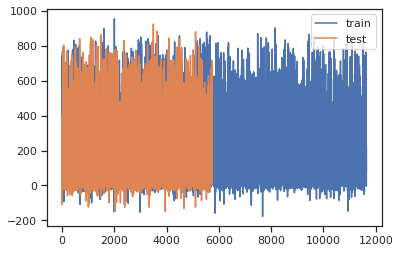

In [125]:
plt.plot(predictions, label="train")
plt.plot(predictions1, label="test")
plt.legend()
plt.show()


In [126]:
svm_model = svm.SVR(C=30)
svm_model.fit(X_train,y_train)
print("SVM")
predictions = svm_model.predict(X_train)
print((mean_squared_error(predictions, y_train)))
predictions = svm_model.predict(X_test)
print((mean_squared_error(predictions, y_test)))
print(svm_model.score(X_test,y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM
1525.7032257978153
1896.9294129180516
0.941585099185855


In [127]:
sample_size = 30

x_plt = predictions.copy()
y_plt = y_test.copy()
indices = np.random.randint(x_plt.shape[0], size=sample_size)
x_plt, y_plt = x_plt[indices], y_test[indices]
x_axis = np.arange(sample_size)

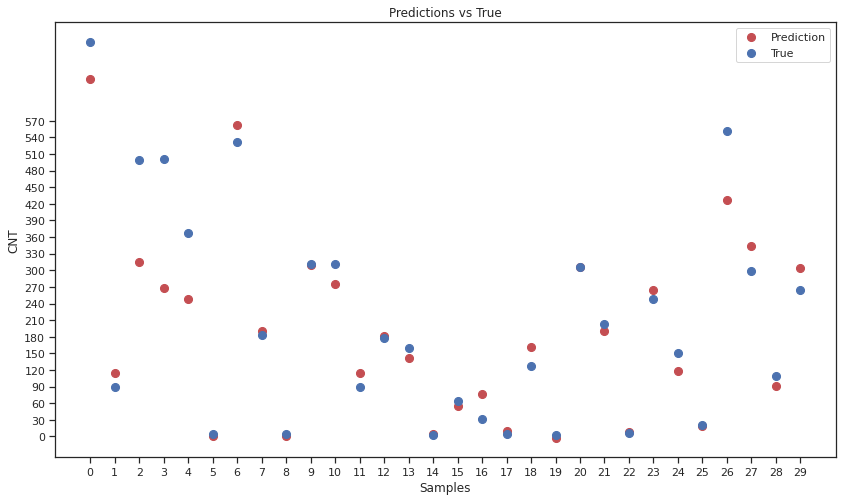

In [129]:
plt.figure(figsize=(14, 8))

plt.scatter(x_axis, x_plt, s=65, color='r', label='Prediction')
plt.scatter(x_axis, y_plt, s=65, color='b', label='True')

plt.xlabel('Samples')
plt.ylabel('CNT')

plt.title('Predictions vs True')

plt.xticks(x_axis)
plt.yticks(np.arange(0, 600, step=30))


plt.legend()
plt.show()

In [133]:
np.mean(predictions),np.mean(y_test) #Mean Predictions vs Mean Testing

(186.00386731627052, 190.0278940027894)

In [134]:
for i in range(15):
  print(predictions[i], y_test[i])

298.8797423149217 [330]
253.14609566257258 [351]
-23.26687443702309 [3]
217.81063003879635 [202]
118.54843460903508 [86]
13.632857928341934 [13]
227.39575394040176 [162]
100.3906029076542 [102]
130.97369815759873 [160]
63.71447687872012 [81]
45.81960614185081 [32]
332.8524765970003 [335]
351.6399569483527 [344]
217.48420398500633 [196]
178.64107253061377 [195]


In [135]:
def mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    return mape


In [136]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
predictions = lnr.predict(X_test)

In [137]:
print (mape(y_test, y_pred))

8.488454630381694


**There is no overfitting as the generalization is good.**


NOTE: By adding polynomial complexity, it is likely that the model stayed at a local minimum. This is why it is important to run it several times if we find that Test's RMSE is high until we find a suitable model.


**Let's validate collinearity**

In [139]:
# Number of variables to be deleted
n = 10

# Compute the correlation matrix 
corr_matrix = np.corrcoef(X, rowvar=False)

# Replace de diagonal with NaN since they are the correlation between the same variables 
np.fill_diagonal(corr_matrix, np.nan)

# Search for the index of the 10 more correlated variables 
top_10_indices = np.argsort(-np.abs(corr_matrix), axis=None)[:n]

# Conversion to pairs of rows and columns 
top_10_pairs = np.unravel_index(top_10_indices, corr_matrix.shape)

# Print variable pairs and their correlation 
for i in range(n):
    var1 = top_10_pairs[0][i]
    var2 = top_10_pairs[1][i]
    corr = corr_matrix[var1, var2]
    print(f"La variable {var1} y variable {var2} tienen un coeficiente de correlacion {corr}")

La variable 441 y variable 448 tienen un coeficiente de correlacion 1.0
La variable 24 y variable 1308 tienen un coeficiente de correlacion 1.0
La variable 18 y variable 623 tienen un coeficiente de correlacion 1.0
La variable 614 y variable 935 tienen un coeficiente de correlacion 1.0
La variable 2058 y variable 49 tienen un coeficiente de correlacion 1.0
La variable 37 y variable 1776 tienen un coeficiente de correlacion 1.0
La variable 1020 y variable 986 tienen un coeficiente de correlacion 1.0
La variable 2021 y variable 47 tienen un coeficiente de correlacion 1.0
La variable 2097 y variable 2170 tienen un coeficiente de correlacion 1.0
La variable 833 y variable 780 tienen un coeficiente de correlacion -1.0


In [140]:
def get_highly_correlated_indices(X, threshold=0.7):
    corr_matrix = np.corrcoef(X, rowvar=False)
    abs_corr_matrix = np.abs(corr_matrix)
    np.fill_diagonal(abs_corr_matrix, 0)
    highly_correlated = np.where(abs_corr_matrix > threshold)
    indices = set()
    for i, j in zip(highly_correlated[0], highly_correlated[1]):
        if i not in indices and j not in indices:
            indices.add(j)
    return list(indices)

In [141]:
len(get_highly_correlated_indices(X))

668

In [142]:
# Compute the correlation matrix
print(X.shape)

# get unique indices of highly correlated features
high_corr_unique = np.unique(get_highly_correlated_indices(X))

# delete highly correlated features
X_filtered = np.delete(X, high_corr_unique, axis=1)
print(X_filtered.shape)

(17379, 2211)
(17379, 1543)


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.33, random_state=1234)

model = LinearRegression()
model.fit(X_train, y_train)
print(len(model.coef_[0]))

predictions = model.predict(X_train)
print((mean_squared_error(predictions, y_train)))
predictions = model.predict(X_test)
print((mean_squared_error(predictions, y_test)))
print(model.score(X_test,y_test))

1543
1526.6075621543325
1787.0207196170525
0.9449696771116692


In [144]:
def mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    return mape


In [146]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
predictions = lnr.predict(X_test)

In [148]:
print (mape(y_test, y_pred))

8.488454630381694


Variables that are highly correlated are not degrading the model, so they include information that could be important.

To make a new prediction with new data, the 16 inputs must be indicated, make one hot coding for all the qualitative variables and then apply degree 2 polynomial features, this must be inputed to the trained model

# Polynomial features (Characteristics) after a PCA

In [149]:
from sklearn.decomposition import PCA
X = df2.copy()
X.drop(columns=['registered','cnt'],inplace=True)
X = X.values

pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
X_pca= pca.transform(X)

[9.99905662e-01 9.41557876e-05]


In [150]:
X_pca.shape

(17379, 2)

In [151]:
scaler = StandardScaler()
poly = PolynomialFeatures(degree=4)

y = df2[['cnt']]
y = y.values

X = poly.fit_transform(X_pca)
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1234)

model = LinearRegression()

model.fit(X_train, y_train)

print(len(model.coef_[0]))

15


In [152]:
predictions = model.predict(X_train)
print((mean_squared_error(predictions, y_train)))
predictions = model.predict(X_test)
print((mean_squared_error(predictions, y_test)))
print(model.score(X_test,y_test))

12822.548371808802
12171.97665300147
0.6251706552415159


We can see that there is not any improvement in the model with dimensionality reduction. In addition, the model loses explainability

In [153]:
svm_model = svm.SVR(C=25)
svm_model.fit(X_train,y_train)
print("SVM")
predictions = svm_model.predict(X_train)
print((mean_squared_error(predictions, y_train)))
predictions = svm_model.predict(X_test)
print((mean_squared_error(predictions, y_test)))
print(svm_model.score(X_test,y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM
14471.036152231298
13924.030703612521
0.5712171117461751


In [154]:
def mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    return mape


In [155]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
predictions = lnr.predict(X_test)

In [156]:
print (mape(y_test, y_pred))

8.488454630381694


Instead of improving, the model performance continuously decreases

# Model 3: Random Forest

With random Forest 

In [163]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[columns], train["cnt"])

RandomForestRegressor(min_samples_leaf=5)

In [164]:
predictions = reg.predict(test[columns])

In [165]:
np.mean((predictions - test["cnt"]) ** 2)

1848.741594930269